# Bird Classifier ML Project.


### Contents:
   [Introduction](#Introduction)
   
   [Learning Audio Processing](#Learning)
   
   [Classification with ANN](#ANN)
   
   
<a id='Top'></a>


## Introduction

With my background in physics, I gravitated easily to the opprotunity to study properties of group IV semiconductors during my masters studies. For my thesis I research the properties of germanium-tin alloys, which are akin to silicon semiconductors, although with a potentially "tunable" electronic and optical spectrum. In the years that followed this research, I became aware that some university research groups were looking at machine learning to predict materials with interesting and desirable properties, and other groups were using high-thoroughput methods using Density Functional Theory (DFT). In my research I used what is called a hybrid functional, becuase DFT alone did not accuarately predict the energy difference between the highest valence orbital and the lowest conduction orbital on either germanium or tin  (sorry, I know there is a lot of Chemistry there you might not remember). Hybrid functionals are far more computationally demanding than DFT, high-thoroughput calculations are not particularly feasible, due to limitations of DFT and the computation requirement of hybrid and other functionals. These issues are what motivated me to start looking into Machine learning as a toolset, as statistical methods showed me that defects in the materials are unavoidable, and I wanted a way to understand how those defects formed. 

My first machine learning project did not go as planned, but I learned a great deal on the methods and algorthms used in various applications. I really wanted to have ownership of the whole process, from data creation to final predictions, much the same as I was doing in my materials research. I teamed up with three PhD Physics candidates with similar goals, two working on theoretical research similar to mine, but in very different materials, and one experimentalist, not not working on materials research. Since all of our research was potentially proprietary, we had to find a totally different scope. Thankfully I was introduced to a graduate student who had spent some time looking parasites in bird blood on slides. As he had completed his work with the slides, he happily donated them to our project. Unfortunately, after some time, we had a fair few images in a dataset, which had to all be redone if they were going to ever be used. I had successfully completed my first tutorial on Classifying Iris flowers with a convolutional neural network, seen here (link coming soon). And, I had created a strong friendship with strangers that will hopefully continue for years, despite that we are now located in different places around the world.




Given how our first project went, we opted to enter a the ["Cornell Bird Call"](https://www.kaggle.com/c/birdsong-recognition) Kaggle competition, only a few weeks before its end of its submittion timeline. I recall that in this plan there was discussion of adapting this to a Quantum Machine Learning program (Uh hum ...). The dataset for this competition included 246 different bird categories with single bird mp3 audio files of various lengths and noise interference. The challenge was determine all birds in a set of long audio files.

## Learning Audio Processing
<a id='Learning'></a>
[Top](#Top)

To understand how to process audio files in Python, I followed the tutorials which can now be found [here](https://github.com/nageshsinghc4/Audio-Data-Analysis-Using-Deep-Learning), courtesy of Nagesh Singh Chauhan. I am sure I first encountered it on the "LevelUp - GitConnected" website, but this is the only link to it I can find at this time. The tutorial used an open database with music audio files, categorizing music samples by genre. His training dataset included 10 genre categories, each with 100 music samples 30 seconds long. This appeared to me to be a good place to start, as I could see how to adapt this to this task.

### Loading Audio files using Librosa

Librosa is a Python Library with tools for music and audio analysis, feature extraction and visualization.

Since I am adapting the tutorial for this task, I choose a single file to test the fuction use for the file. I honestly do not recall how I chose to choose this particular Wood duck file, but I likely when through a few before locating one that was not already at 44.1 KHz.## Learning Audio Processing


In [1]:
# Loading Librosa Library
import librosa

# Load Audio File
audio_data = '../input/birdsong-recognition/train_audio/wooduc/XC161436.mp3'
x, sr = librosa.load(audio_data)

# Checking the Sample Rate, Signal length and duration of audio file. 
print("Sample rate  :", sr)
print("Signal Length:", len(x))
print("Duration     :", len(x)/sr, "seconds")

/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Sample rate  : 22050
Signal Length: 475776
Duration     : 21.577142857142857 seconds


In [2]:
# Loading IPython Library show media player
import IPython.display as ipd

# To play the audio
ipd.Audio(x, rate=sr)

### Visualizing Audio

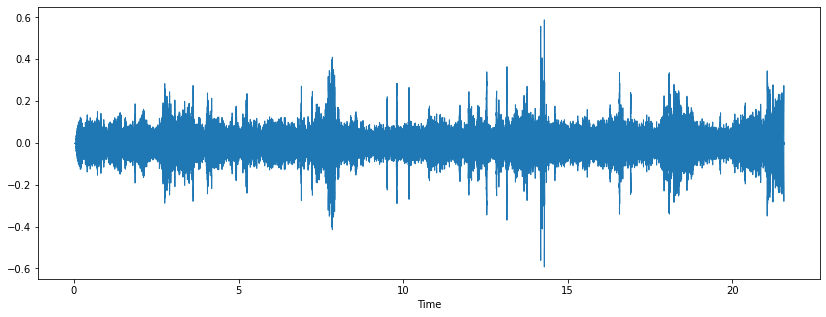

In [3]:
# Setting up to show visuals inline
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

# Showing a wave plot of the file in the time domain
plt.figure(figsize=(14,5))
librosa.display.waveshow(x,sr=sr) # Why can I not use waveplot here?

### Creating a Spectrogram

A spectrogram is a graphical representation of the signal strength of a signal, frequencies vs intesity, and are generally shown as a heat map.


In the Librosa package, the '.stft()' function converts data into a short-time Fourier transform (STFT). In signal procesing, a STFT converts signals from the time domain into the frequency domain by computing discrete Fourier transforms (also  uses the DFT acronym) over short overlapping windows.

The '.specshow()' function is used to display a spectrogram.

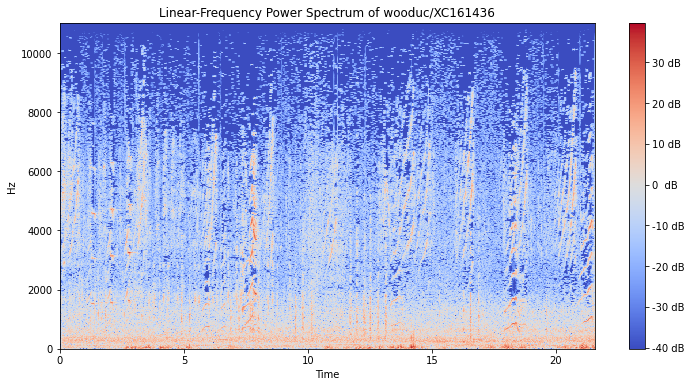

In [4]:
# Performing the STFT to convert from Time domain to Frequency Domain
X = librosa.stft(x)

# Want to plot amplitude as Db, as standard in Digital Signal Processing.
XDb = librosa.amplitude_to_db(abs(X))

# Creating the Spectrogram Plot
fig, ax = plt.subplots(figsize=(12,6))
img =librosa.display.specshow(XDb, sr=sr, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear-Frequency Power Spectrum of wooduc/XC161436')
fig.colorbar(img, ax=ax, format="%-2.f dB")


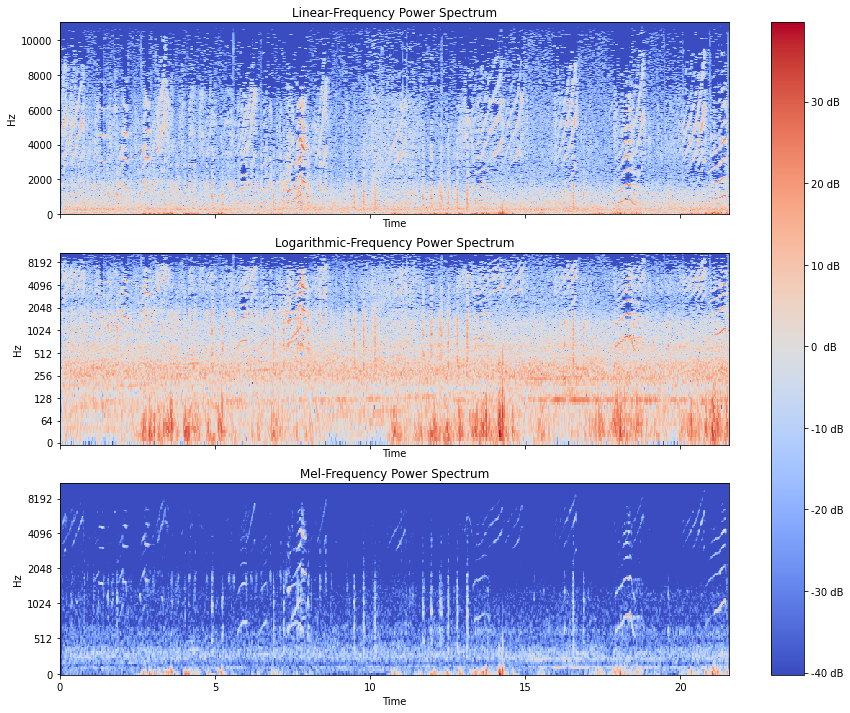

In [5]:
# Passing through a Mel spectrum filter
S = librosa.feature.melspectrogram(y=x, sr=sr)
SDb = librosa.amplitude_to_db(abs(S))

# Comparing relavent Display Frequency types
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15,12))
img =librosa.display.specshow(XDb, sr=sr, x_axis='time', y_axis='linear', ax=ax[0])
ax[0].set(title='Linear-Frequency Power Spectrum')
librosa.display.specshow(XDb, sr=sr, x_axis='time', y_axis='log', ax=ax[1])
ax[1].set(title='Logarithmic-Frequency Power Spectrum')
librosa.display.specshow(SDb, sr=sr, x_axis='time', y_axis='mel', ax=ax[2])
ax[2].set(title='Mel-Frequency Power Spectrum')
fig.colorbar(img, ax=ax, format="%-2.f dB")

## Feature Extraction from Audio Signal

Scikit-Learn ( or Sklearn) is a machine learning library and statistical modeling. Wheras Librosa is useful for loading , manipulating and summarizing the audio files, Scikit-Learn is useful for modelling the data. 

In this section I will be investigating some of the extraction features available with the Librosa library:

    
   - **Spectral Centroid ('spectral_centroid()')** to compute the center of mass, or the mean, of the spectrum. Normalized using Sklearn.
   
   
   - **Spectral Bandwidth ('spectral_bandwidth()')** which calculates the pth order bandwidth of the signal. Spectral Bandwidth is the wavelength interval in which a spectral quantity is not less than half its maximum value. The default Librosa p value is set for 2 Db.

   - **Spectral Roll-off ('spectral_rolloff()')** computes the roll-off frequency, or the frequency below a specific percentage of the total energy. Librosa defaults to 85%, however the minimum or maximum frequency can be estimated by setting the roll_percent value to near 0 or 1.
   
   
   - **Chomagram STFT ('chroma_stft()')** computes a chromagram from a waveform or power spectrogram.
   
   
   - **Mel-Frequency Cepstral Coefficients or MFCCs ('mfcc()')** computes the coeficients of the mel-frequency cepstrum, which is a representation of the short-term power spectrum of a sound. The Mel scale is perceptually relavent in the tutorial due to its relationship with human audio perceptions. 
    
#### Spectral Centroid

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


(930,)


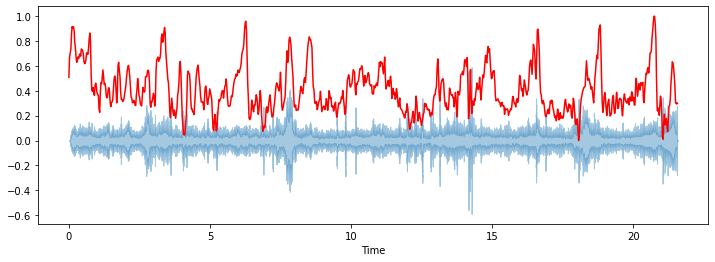

In [6]:
# Loading Scikit-Learn Library
import sklearn

# Extracting the spectral centroid
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
print(spectral_centroids.shape)

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Defining the Normalising function the spectral centroid
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

#### Spectral Bandwidth

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  after removing the cwd from sys.path.


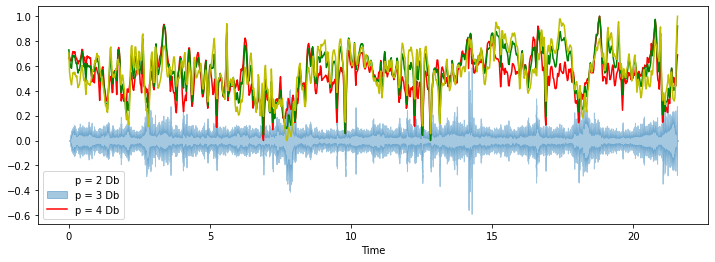

In [7]:
# Calculating the Spectral Bandwidth
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x, sr=sr, p=4)[0]

# Ploting the Spectral Bandwidths along the waveplot
plt.figure(figsize=(12,4))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2 Db', 'p = 3 Db', 'p = 4 Db'))

#### Spectral Rolloff

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


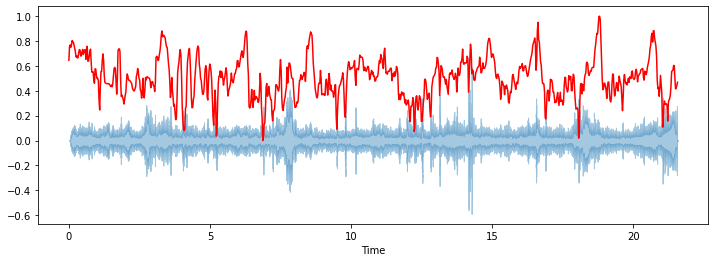

In [8]:
# Calculating the sprectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]

# Plotting the spectral rolloff along the waveplot
plt.figure(figsize=(12, 4))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

#### Chromagram STFT

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


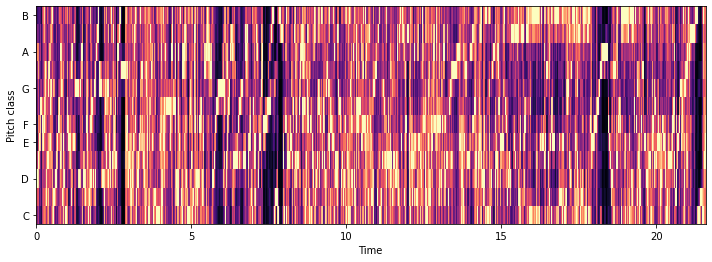

In [9]:
# Calculating the Chromagram STFT
chromagram = librosa.feature.chroma_stft(x, sr=sr)

# Plot the chromagram
plt.figure(figsize=(12, 4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma')

#### Mel-Frequency Cepstral Coefficients (MFCCs)

In [10]:
# Calculating the MFCCs
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

(20, 930)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


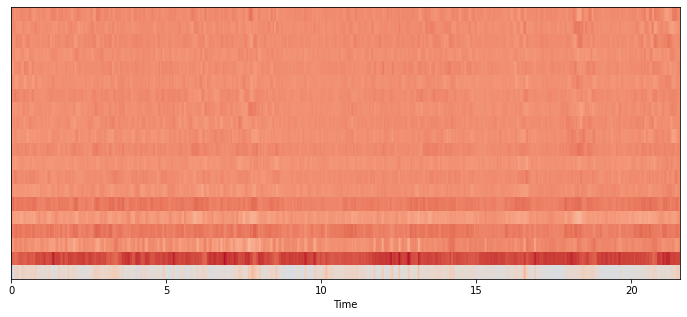

In [11]:
#Displaying  the MFCCs:
plt.figure(figsize=(12, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## Classification with ANN
<a id='ANN'></a>
[Top](#Top)

Part of what drew me to this tutorial was that it included steps to get through both a Artificial Neural network (ANN) and Convolutional neural network (CNN), on the same dataset. The ANN would work on the feature calculations that we extract using Librosa, which can be exported to a comma seperated file (CSV) for use, and the CNN can work on a graphical image set made from the original datasets using one of the waveform of specshow displays using one of the librosa feature calculations. I will be using the Keras framework for training the network and testing.

Artificial Neural Networks are computational algorithms intendented to simulate a human (or other biological) brain with the use of "neurons" or nodes. Typically this method has three layers:
  
  * **Input Layer**: Takes the input and the features of each observation. This is a passive layer, in that it does not change the data in any way.
  
  * **Hidden Layer**: Proccess and transforms the data using weighted connections. There may be more than one hidden layer.
  
  * **Output Layer**: As this is a classification problem, there is only one output layer that takes the connections from the hidden layer and assigns a value that aligns with the prediction category. Success for this is dependent on the selection of the weights in the hidden layer.
  
See [here](https://www.softwaretestinghelp.com/artificial-neural-network/) for more details on ANNs.  

For this first submissions, I contemplated the goal and what I have been provided. This set incldued audio files, each with different lengths and levels of background noise. There is no set for background noise only in order to categorize for a "no bird" category. The audio I was given is assumed to only include one bird type in each file, whereas the submission long files would have had muliple birds. Instance detection would have to come later, so I assumed for the sake of simplicity that each bird would be singing alone.

### Setup:

In [12]:
# Loading Libraries
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
from PIL import Image
import pathlib
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential

from time import perf_counter
import warnings
warnings.filterwarnings('ignore')
tf.autograph.experimental.do_not_convert

<function tensorflow.python.autograph.impl.api.do_not_convert(func=None)>

In [13]:
# Setting the directories
root_path = './'
audio_path = '../input/birdsong-recognition/train_audio'

In [14]:
# Setting Variables
sr = 44100
birds = next(os.walk(audio_path))[1]
start_time = perf_counter()

### Dataset Creation

As discussed above, the features can be extracted using the Librosa package and its feature calculations on each audio file. Additionally, the root mean square and zero crossing rate are also included, but for simplitity, we will only use the mean from these calculations to reduce the dataset to include one value for each feature for coeficient. 

These calculations are bit computationally demanding, and therefore will take a bit of time, so to use it at a later time, it will be saved to a CSV (space delimited) that can then be accessed at a later date.


In [15]:
# Creating the CSV header for the input data
header = 'filename chroma_stft rms spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()


file = open('bird_data_ANN.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
    
## Writing data to CSV
for b in birds:
    for filename in os.listdir(audio_path+'/'+b):
        birdsong = audio_path+'/'+b+'/'+filename
        if birdsong == audio_path+'/lotduc/XC195038.mp3': # This file creates a divide by zero issue for some reason
            continue
        y, sr = librosa.load(birdsong, mono=True, duration=30)
        rms = librosa.feature.rms(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {b}'
        file = open('bird_data_ANN.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

## Exporatory Analysis of the input data

In [16]:
            
# Data Loading
data = pd.read_csv('bird_data_ANN.csv')
data.head()

,filename,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,XC153881.mp3,0.486426,0.024541,4306.202439,2693.687315,7455.846582,0.353120,-284.969147,15.030062,-17.093914,...,-3.195694,-13.126134,-6.431028,-8.057491,-4.296419,-9.871672,-1.358866,-9.697476,-3.895353,rudduc
1,XC423355.mp3,0.605970,0.042719,1473.850595,2146.508724,3384.554534,0.040043,-300.237915,96.928329,-0.586486,...,10.385256,-1.754740,14.223240,3.699701,3.875227,-1.869209,4.363472,1.211985,1.434141,rudduc
2,XC45484.mp3,0.544082,0.030441,1639.920395,2057.897360,3626.253964,0.075849,-236.833023,132.133209,-2.450262,...,2.441734,-2.910505,3.188989,-1.995159,4.038676,-1.651541,4.125493,-2.548131,2.442685,rudduc
3,XC109911.mp3,0.487297,0.017607,2703.284611,2189.226888,4890.787093,0.177638,-270.519653,74.478348,-34.381390,...,2.949447,-3.341356,6.257710,-2.266885,4.316693,-3.614226,2.414465,-0.923584,4.430473,rudduc
4,XC299486.mp3,0.464386,0.008797,3571.751941,2869.265094,7320.468080,0.226126,-301.442322,43.904617,-30.670851,...,-5.132264,-10.398127,-0.317183,-4.417752,-0.253550,-5.214087,-0.517198,-5.816558,0.369251,rudduc


In [17]:
# Dropping header column for data input
data = data.drop(['filename'],axis=1)

#Encoding the Labels
bird_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(bird_list)

#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

#Dividing data into training and Testing sets with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Model Definition

In [18]:
# Build ANN Model using Sequential
model = Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(264, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

2022-03-22 06:58:04.086523: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Training

In [19]:
# Training the model
classifier = model.fit(X_train,
                    y_train,
                    epochs=1000,
                    batch_size=250)

# Save model when training is complete to a file
model.save("birdsong-classifier.tfl")
print("Network trained and saved as birdsong-classifier.tfl!")

2022-03-22 06:58:05.372373: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
69/69 [==============================] - 1s 8ms/step - loss: 5.4708 - accuracy: 0.0147
Epoch 2/1000
69/69 [==============================] - 1s 8ms/step - loss: 5.0900 - accuracy: 0.0459
Epoch 3/1000
69/69 [==============================] - 1s 8ms/step - loss: 4.7628 - accuracy: 0.0791
Epoch 4/1000
69/69 [==============================] - 1s 8ms/step - loss: 4.5487 - accuracy: 0.1060
Epoch 5/1000
69/69 [==============================] - 1s 8ms/step - loss: 4.3946 - accuracy: 0.1184
Epoch 6/1000
69/69 [==============================] - 1s 8ms/step - loss: 4.2742 - accuracy: 0.1363
Epoch 7/1000
69/69 [==============================] - 1s 8ms/step - loss: 4.1680 - accuracy: 0.1507
Epoch 8/1000
69/69 [==============================] - 1s 8ms/step - loss: 4.0656 - accuracy: 0.1634
Epoch 9/1000
69/69 [==============================] - 1s 8ms/step - loss: 3.9689 - accuracy: 0.1759
Epoch 10/1000
69/69 [==============================] - 1s 10ms/step - loss: 3.8869 - accuracy: 0.190

2022-03-22 07:07:59.168769: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Network trained and saved as birdsong-classifier.tfl!


### Evalulation

In [20]:
print(model.evaluate(X_test, y_test))

134/134 [==============================] - 0s 2ms/step - loss: 22.9980 - accuracy: 0.1478
[22.997968673706055, 0.14783625304698944]


### Testing the Output for Submission

In [21]:
# START OF PREDICTION OUTPUT TO SUBMISSION.CSV

test_file = '../input/birdsong-recognition/example_test_audio'

# Creating test_summary.csv header
sum_header = 'filename time chroma_stft rms spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    sum_header += f' mfcc{i}'
sum_header += ' bird'
sum_header = sum_header.split()


sum_file = open('test_summary.csv', 'w', newline='')
with sum_file:
    writer = csv.writer(sum_file)
    writer.writerow(sum_header)
    
# Creating summition.csv header
out_header = ['row_id', 'birds'];

out_file = open('submission.csv', 'w', newline='')
with out_file:
    writer = csv.writer(out_file)
    writer.writerow(out_header)


# Loop to split test file into 5 second clips and test each clip
for file in os.listdir(test_file):
    birdsong = test_file+'/'+file
    xt, sr = librosa.load(birdsong, sr=44100)
    working_file=file.split('.')[0]
    print(working_file)
    
    # Get number of samples for 5 seconds
    clip_rate = 5 * sr
    time = 5
    samples_total = len(xt)/clip_rate
    
    for n in range(int(samples_total)):
        # array of 5 second clip
        yt = xt[n:n+clip_rate]
        
        # Feature extract 5 second 
        rms = librosa.feature.rms(y=yt)
        chroma_stft = librosa.feature.chroma_stft(y=yt, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=yt, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=yt, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=yt, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(yt)
        mfcc = librosa.feature.mfcc(y=yt, sr=sr)
        
        # Write output to submission.csv
        row_id = file.split(".")
        to_out = row_id[0]+'_'+str(time)
        
        #Write features to np array for prediction
        to_test = [np.mean(chroma_stft),np.mean(rms),np.mean(spec_cent),np.mean(spec_bw),np.mean(rolloff),np.mean(zcr)] 
        to_write = f'{to_out} {time} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_write += f' {np.mean(e)}'
            to_test.append(np.mean(e)) 
        
        # Use model to predict
        to_predict =tf.expand_dims(to_test, axis=0)
        print(to_predict)
        bird = model.predict(to_predict)
        
        to_write += f' {birds[np.argmax(bird)]}'
        to_out += f' {birds[np.argmax(bird)]}'
        
        #Write to test_summary.csv
        summary = open('test_summary.csv', 'a', newline='')
        with summary:
            writer = csv.writer(summary)
            writer.writerow(to_write.split())
            
        #Write to submission.csv
        submit = open('submission.csv', 'a', newline='')
        with submit:
            writer = csv.writer(submit)
            writer.writerow(to_out.split())
        
        print(time, "Complete")
        time = time+5
        
        
end_time = (perf_counter())/3600
print("Done")

print("Total Runtime = ", end_time-start_time, " hours")




ORANGE-7-CAP_20190606_093000
tf.Tensor(
[[ 5.6059176e-01  2.8320547e-02  1.9615409e+03  1.8574779e+03
   3.4923259e+03  7.0356682e-02 -3.5774957e+02  2.2961050e+02
  -6.7285995e+01  4.6444668e+01 -1.8794744e+01 -1.8226974e+01
   2.8392460e+01 -3.3671886e+01  7.4336967e+00  7.7428689e+00
  -1.5864869e+01  1.3922395e+01 -1.5795055e+01 -1.6055396e+00
   1.4282060e+01 -1.0236984e+01  9.2509480e+00 -1.8293419e+00
  -5.9689116e+00  1.0579974e+01]], shape=(1, 26), dtype=float32)
5 Complete
tf.Tensor(
[[ 5.60593188e-01  2.83204280e-02  1.96301477e+03  1.86002856e+03
   3.49582300e+03  7.03600794e-02 -3.57681976e+02  2.29523544e+02
  -6.72225571e+01  4.64096413e+01 -1.87834072e+01 -1.82253437e+01
   2.83808231e+01 -3.36578369e+01  7.42511797e+00  7.74381113e+00
  -1.58599682e+01  1.39161062e+01 -1.57928505e+01 -1.60264778e+00
   1.42797813e+01 -1.02356853e+01  9.25140381e+00 -1.83178139e+00
  -5.96505070e+00  1.05796251e+01]], shape=(1, 26), dtype=float32)
10 Complete
tf.Tensor(
[[ 5.6288600e-0

After a CPU run (no accelerators, this took 10 hrs and 26 minutes with only prediction success of about 13%. 

A GPU run lasted more than 12 hours long, which were deducted from my weekly limit and it did not finish!!

## Next Steps:

An exporatory analysis of the birds needs to be done to further understand how a bias might be present, as I am aware that there is an irregular number of files for each category of bird (some may have as few as 4 audio files). My next step is to look into this, and possibly filter the number going into the model, as well as reduce the number of calculations that I put into the csv data. These two steps should reduce the time needed to run the notebook. Lastly, I will create separate notebooks which can be submitted, which do not include of the exploration of variables and feature calculations. These notbooks will be linked below when made available.
